In [107]:
#import libraries
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
# Read the datasets

df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**About columns**

**N** - ratio of Nitrogen content in soil  
**P** - ratio of Phosphorous content in soil  
**K** - ratio of Potassium content in soil  
**temperature** - temperature in degree Celsius  
**humidity** - relative humidity in %  
**ph** - ph value of the soil  
**rainfall** - rainfall in mm  

In [109]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [110]:
#check the random sample datasets
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
553,39,36,22,29.343174,60.503209,9.072011,34.033355,mothbeans
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
1721,58,67,45,38.723828,91.725149,6.702425,62.623771,papaya
182,60,57,24,18.661162,61.553272,6.121294,75.032477,maize
1188,22,18,31,30.764552,47.937915,5.956027,90.385035,mango


In [111]:
#shape of the datasets
df.shape

(2200, 8)

In [112]:
#check the columns of datasets 
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [113]:
#check the labels of datasets
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [114]:
#check the total records of each individual classes
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [115]:
#check the total unique value for crop dataframe
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [116]:
#check the null values 

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [117]:
#check the Datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [118]:
#describe the datasets
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [119]:
# df1 = df.iloc[:,0:-1]
df1 = df.columns[:-1]
df1

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

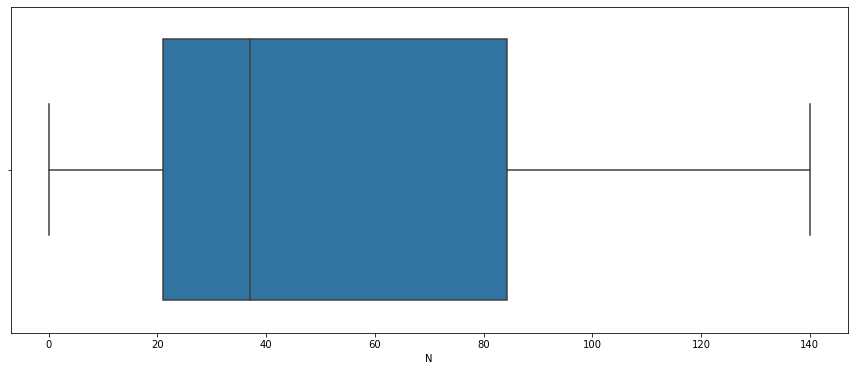

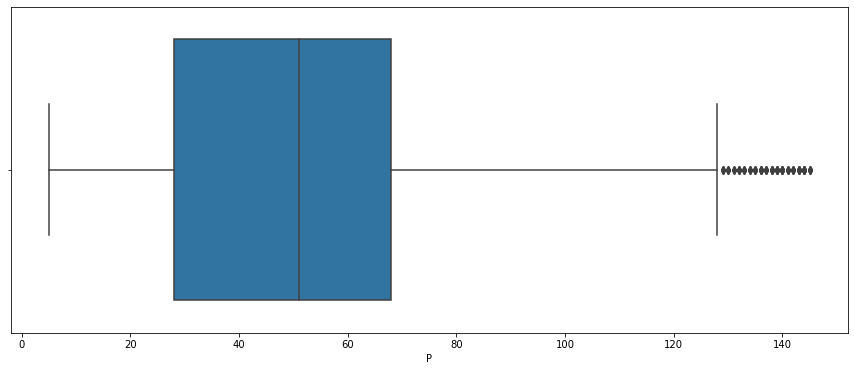

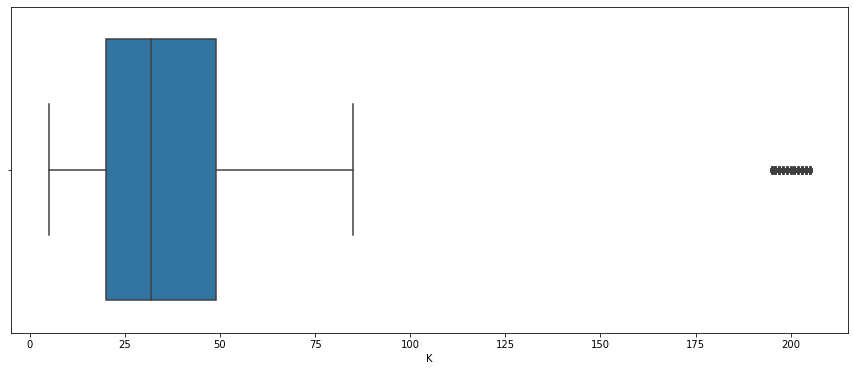

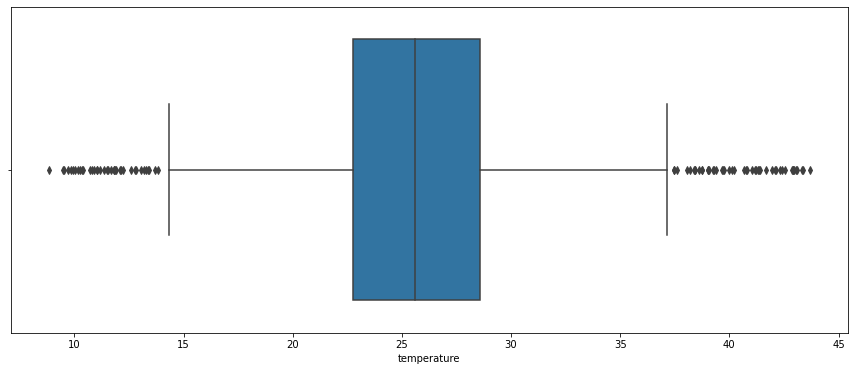

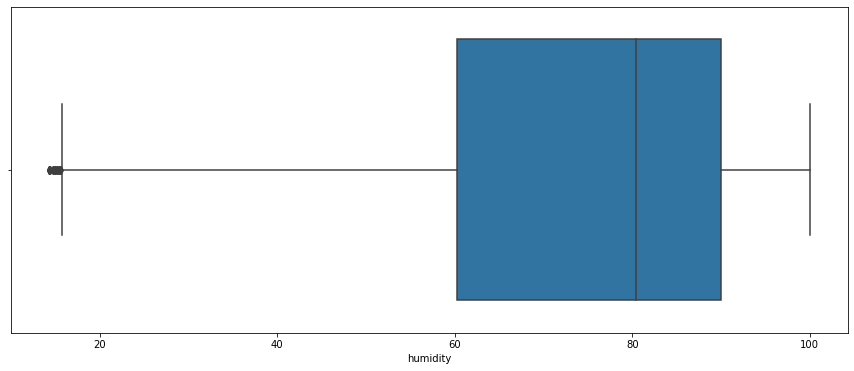

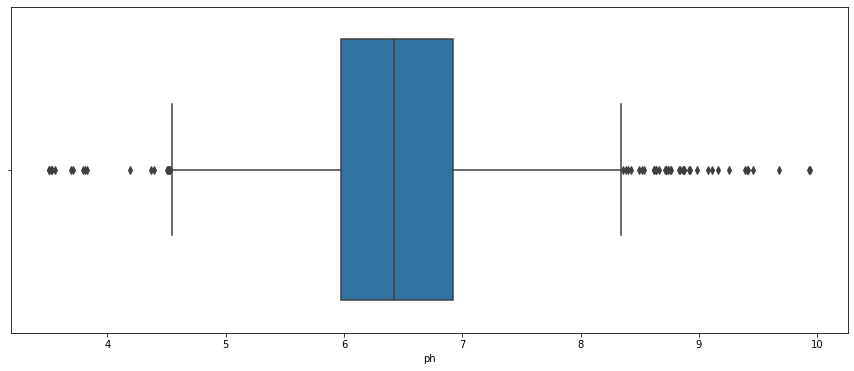

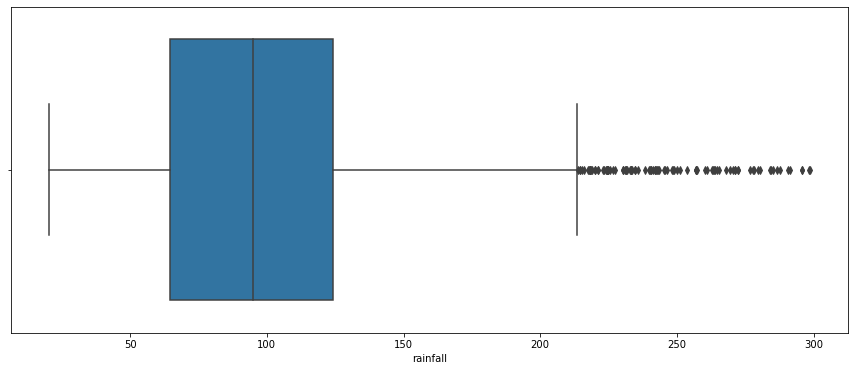

In [120]:
for i in df1:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    

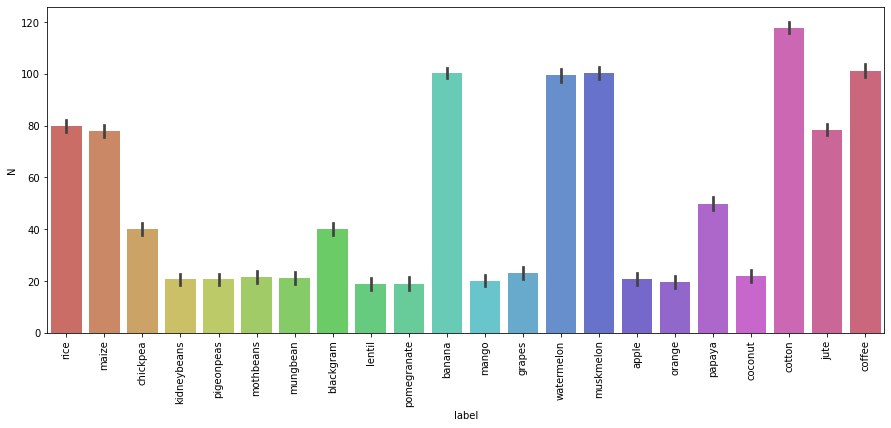

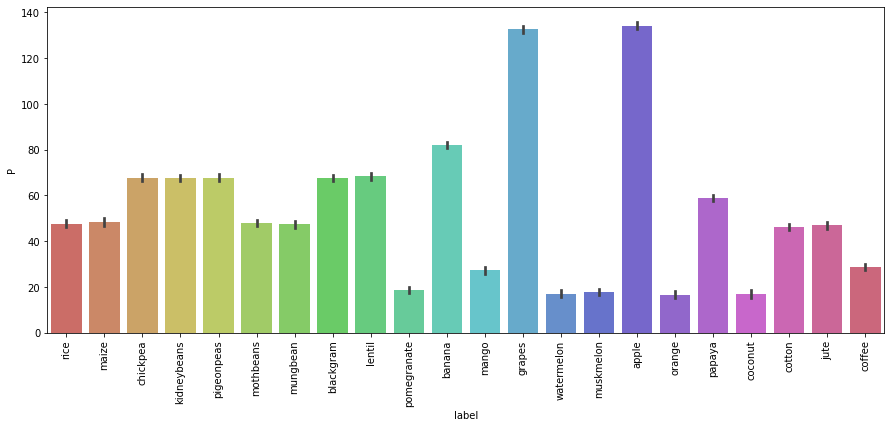

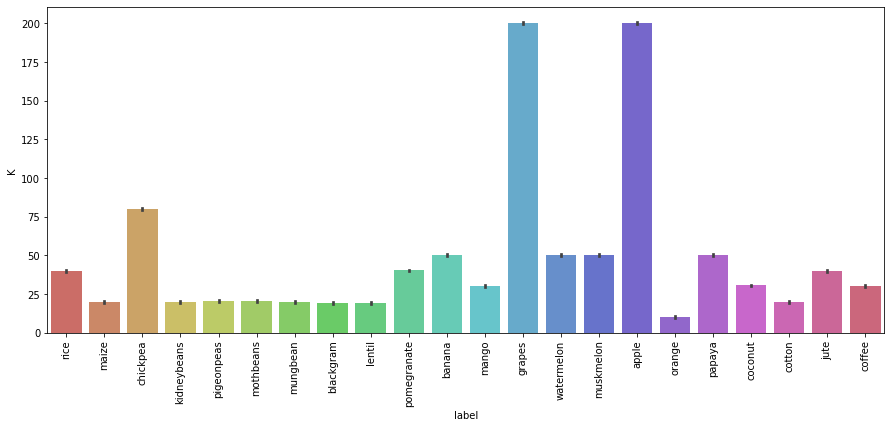

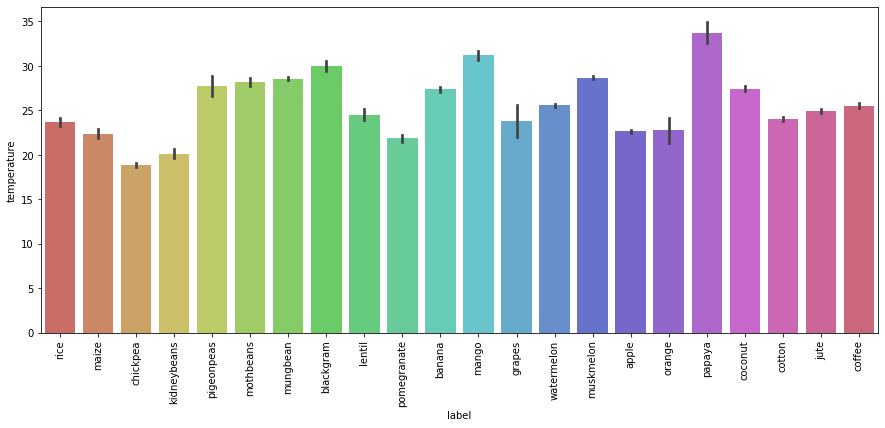

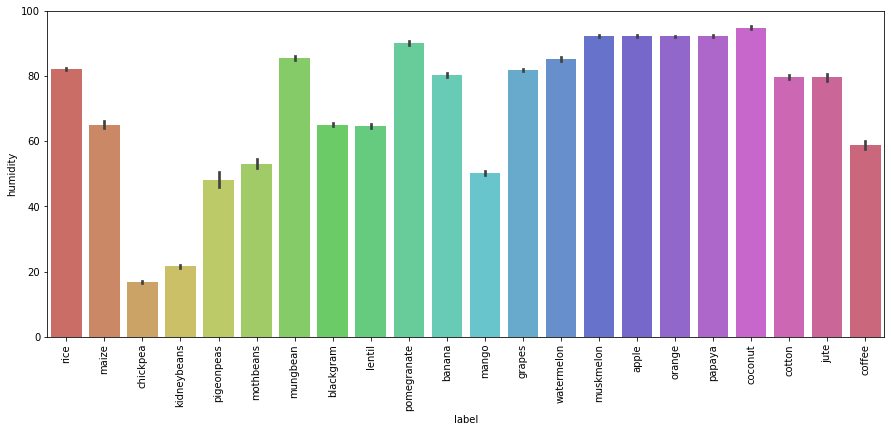

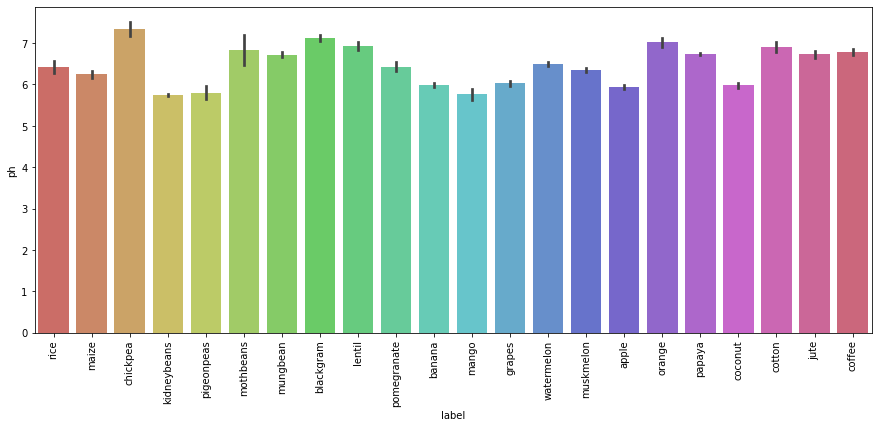

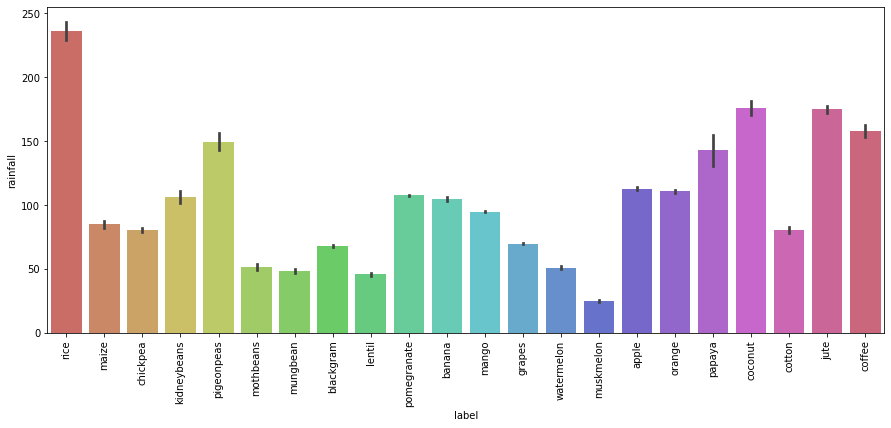

In [121]:
for i in df1:
    plt.figure(figsize=(15,6))
    sns.barplot(y = i, x = 'label', data=df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [122]:
#check the correclation of datasets
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


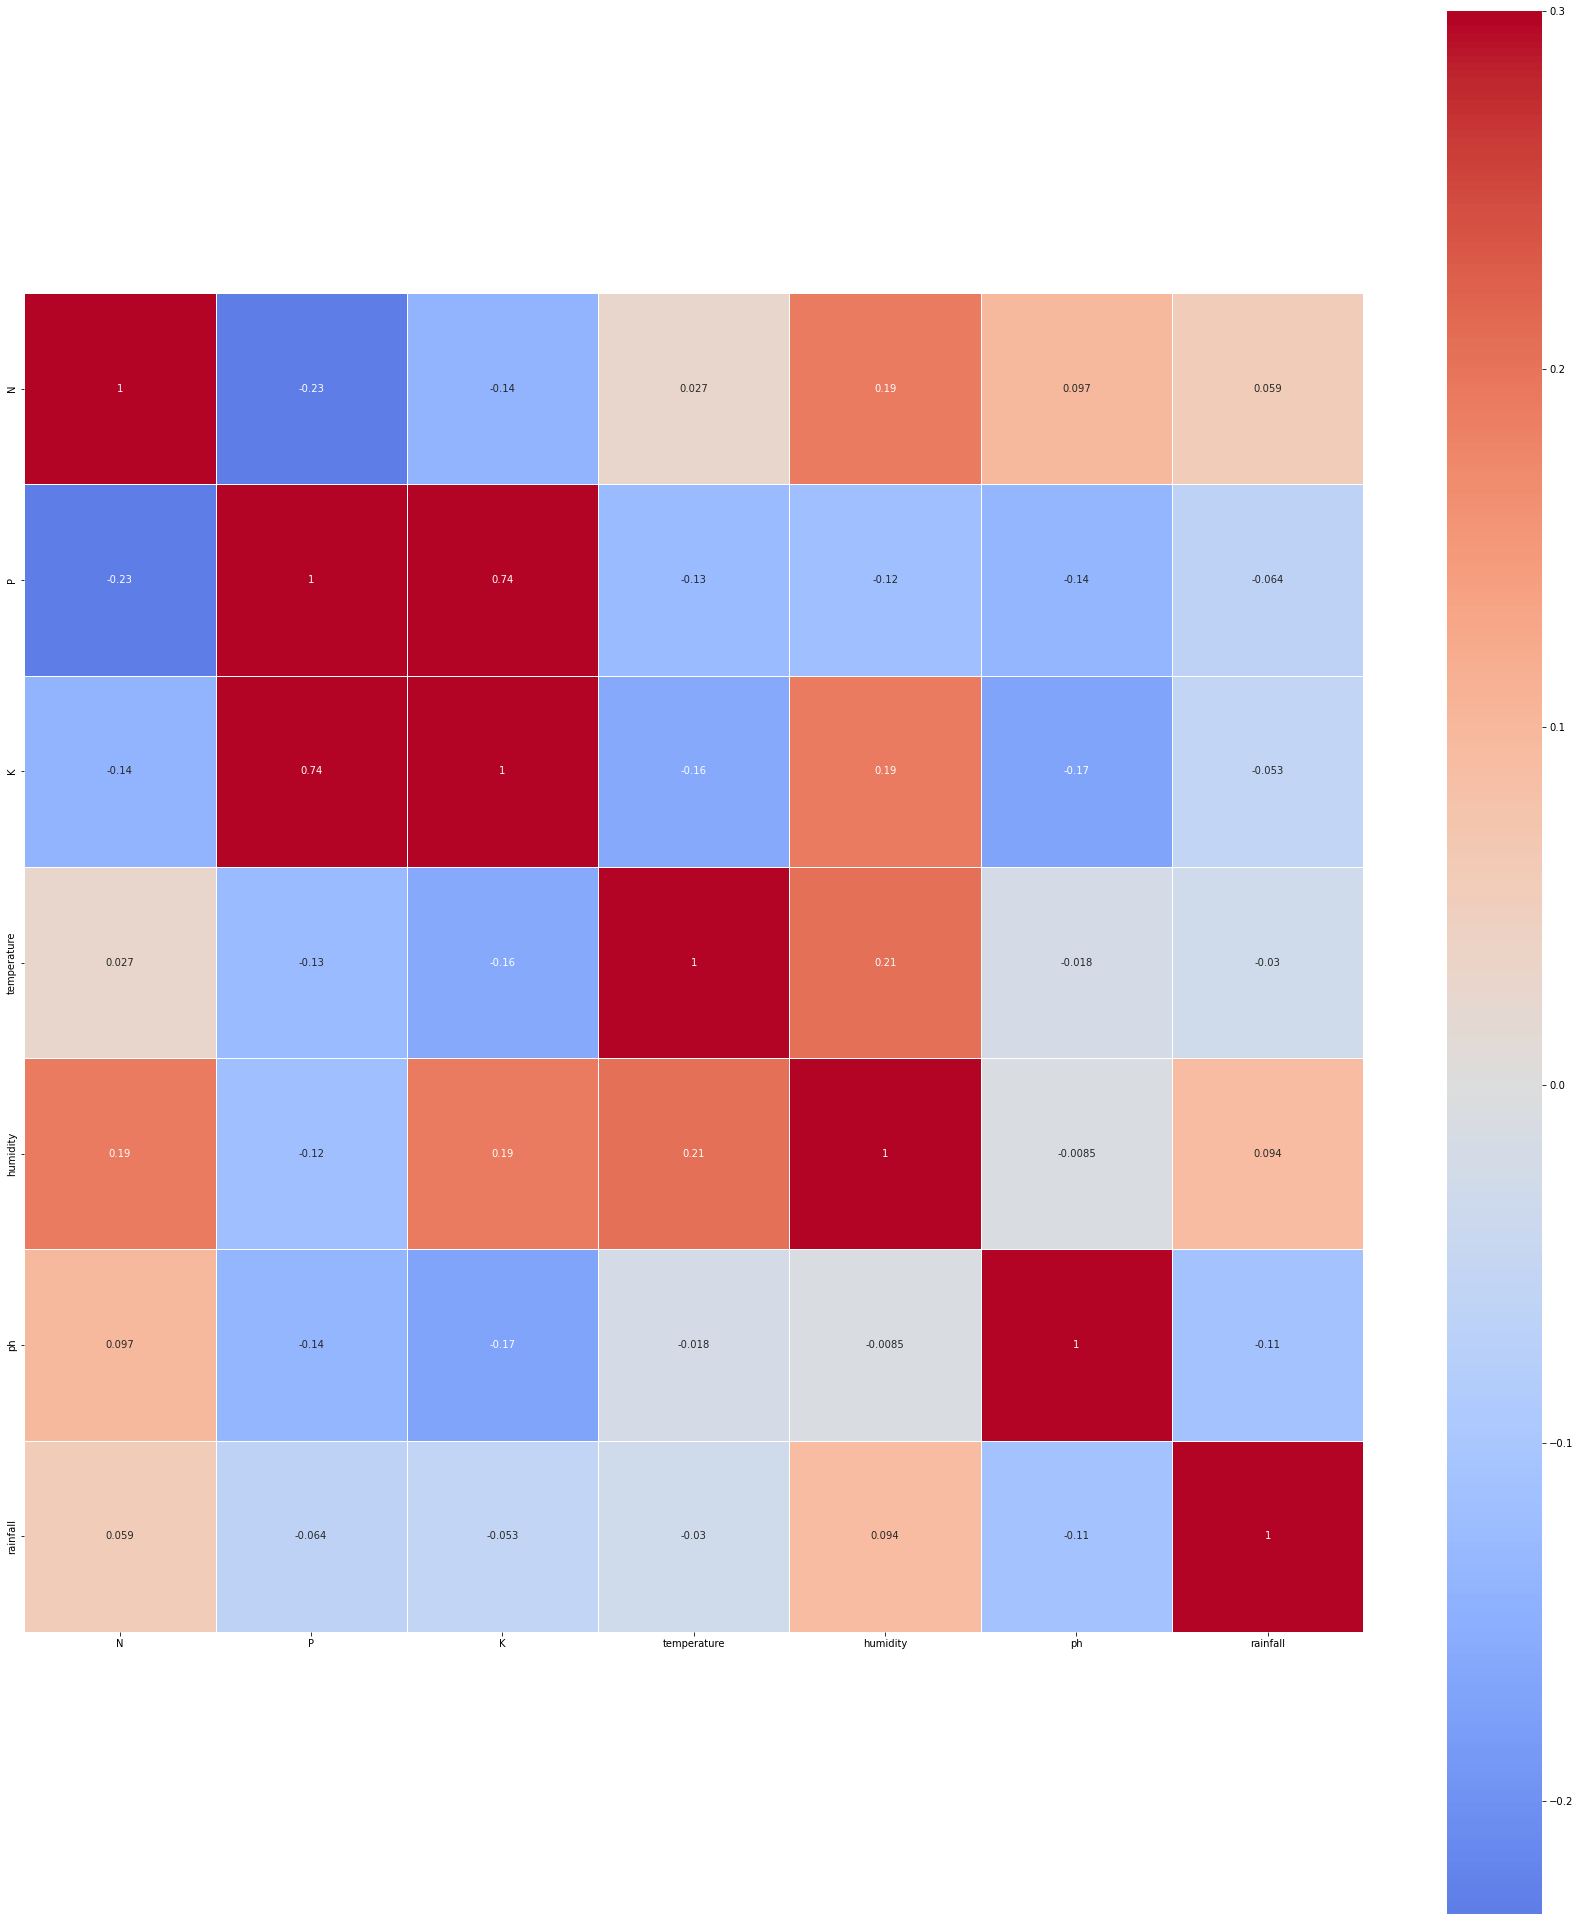

In [123]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),  cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [124]:
df['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [125]:
from sklearn import preprocessing
label_name = df.label.unique()
y_label = pd.DataFrame(label_name, columns = ['crop_name'])
label_encoder = preprocessing.LabelEncoder()
y_label['Crop_number']= label_encoder.fit_transform(y_label['crop_name'])
y_label

,crop_name,Crop_number
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


In [126]:
#change the label categorical data into numeric
#preprocessing
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y']= label_encoder.fit_transform(df['label'])
df['y'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [127]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [131]:
#separate the dependent and independent variable
X = df.iloc[:,0:-2]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [132]:
y = df.iloc[:,-1]
y.head()

0    20
1    20
2    20
3    20
4    20
Name: y, dtype: int32

In [137]:
#split the datasets:
from sklearn.model_selection import train_test_split
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_, y_val_, test_size = 0.5, random_state = 42)

print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1760, 7)
Shape of the y Train : (1760,)
Shape of the X val : (220, 7)
Shape of the y val : (220,)
Shape of the X test : (220, 7)
Shape of the y test : (220,)


In [143]:
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
99,65,37,40,23.359054,83.595123,5.333323,188.413665
1337,117,27,48,26.532593,82.390540,6.835268,54.306608
316,22,79,17,21.424511,20.396597,5.912290,116.520692
985,39,25,36,18.902230,94.998975,5.567805,107.610321
471,5,77,19,31.085650,66.688330,6.242052,175.930327


In [145]:
y_test.head()

99      20
1337    21
316      9
985     19
471     18
Name: y, dtype: int32

In [147]:
#model Training
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
model = RF.fit(X_train , y_train)

In [149]:
#check the accuracy of an model.
model.score(X_val_,y_val_)

0.9931818181818182

In [165]:
#save the model into pickle file
import pickle as pkl

with open('Crop_recommedation_RF.pkl','wb') as f:
    pkl.dump(model,f)

In [159]:
#predict 
model.predict(X_val_)

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [161]:
#concatenate X_test and y_test for testing purpose

crop_test = pd.concat([X_test,y_test],axis = 1)
crop_test

,N,P,K,temperature,humidity,ph,rainfall,y
99,65,37,40,23.359054,83.595123,5.333323,188.413665,20
1337,117,27,48,26.532593,82.390540,6.835268,54.306608,21
316,22,79,17,21.424511,20.396597,5.912290,116.520692,9
985,39,25,36,18.902230,94.998975,5.567805,107.610321,19
471,5,77,19,31.085650,66.688330,6.242052,175.930327,18
...,...,...,...,...,...,...,...,...
1708,38,68,54,29.337105,90.817814,6.739170,202.057275,17
275,27,79,82,17.065793,17.540241,6.307005,70.871506,3
1868,8,26,26,25.547599,91.641948,5.702485,212.867626,4
721,25,71,24,28.495387,60.448484,7.187722,74.915595,2


In [163]:
#convert into csv file

crop_test.to_csv('crop_recommendation_test.csv')
y_label.to_csv('label_name_number.csv')